# 건물유형 별 예측 결과 병합

In [1]:
''' import '''
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

plt.rc('font', family='Malgun Gothic') # For Windows
# print(plt.rcParams['font.family'])
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [15]:
eid = 47  # 실험 번호

In [3]:
''' define metric function '''
def smape(df):
    true, pred = df['true'], df['pred']
    numerator = np.abs(true - pred)
    denominator = (np.abs(true) + np.abs(pred)) / 2.0
    smape_score = np.mean(numerator / denominator) * 100.0
    return smape_score

' define metric function '

### Valid

In [4]:
''' load valid datasets '''
public = pd.read_csv(f'../valid/v_lightgbm_{eid}_public.csv')
uni = pd.read_csv(f'../valid/v_lightgbm_{eid}_uni.csv')
dcenter = pd.read_csv(f'../valid/v_lightgbm_{eid}_dcenter.csv')
dstore = pd.read_csv(f'../valid/v_lightgbm_{eid}_dstore.csv')
medic = pd.read_csv(f'../valid/v_lightgbm_{eid}_medic.csv')
comm = pd.read_csv(f'../valid/v_lightgbm_{eid}_comm.csv')
apart = pd.read_csv(f'../valid/v_lightgbm_{eid}_apart.csv')
lab = pd.read_csv(f'../valid/v_lightgbm_{eid}_lab.csv')
biz = pd.read_csv(f'../valid/v_lightgbm_{eid}_biz.csv')
mart = pd.read_csv(f'../valid/v_lightgbm_{eid}_mart.csv')
hotel = pd.read_csv(f'../valid/v_lightgbm_{eid}_hotel.csv')
others = pd.read_csv(f'../valid/v_lightgbm_{eid}_others.csv')

' load valid datasets '

In [5]:
data = [public, uni, dcenter, dstore, medic, comm, apart, lab, biz, mart, hotel, others]
data = pd.concat(data)
data = data[['건물번호', 'datehour', 'true', 'pred', 'error']]  # '건물유형'
data = data.sort_values(['건물번호', 'datehour']).reset_index(drop=True)

In [6]:
''' print valid scores of each '''
print('public :', smape(public).round(5))
print('uni :', smape(uni).round(5))
print('dcenter :', smape(dcenter).round(5))
print('dstore :', smape(dstore).round(5))
print('medic :', smape(medic).round(5))
print('comm :', smape(comm).round(5))
print('apart :', smape(apart).round(5))
print('biz :', smape(biz).round(5))
print('lab :', smape(lab).round(5))
print('mart :', smape(mart).round(5))
print('hotel :', smape(hotel).round(5))
print('others :', smape(others).round(5))

' print valid scores of each '

public : 5.24244
uni : 2.99606
dcenter : 0.48992
dstore : 5.67652
medic : 2.86796
comm : 3.87686
apart : 4.26315
biz : 2.90961
lab : 4.15457
mart : 5.48166
hotel : 5.68667
others : 7.79853


In [7]:
print('total :', smape(data).round(5))

total : 4.95811


In [17]:
data.to_csv(f'../valid/v_lightgbm_{eid}.csv', index=False)

##### Valid 실제-예측값 비교 그래프

In [8]:
def get_b_nums(df):
    return df['건물번호'].unique()

- 건물번호 개별 그래프

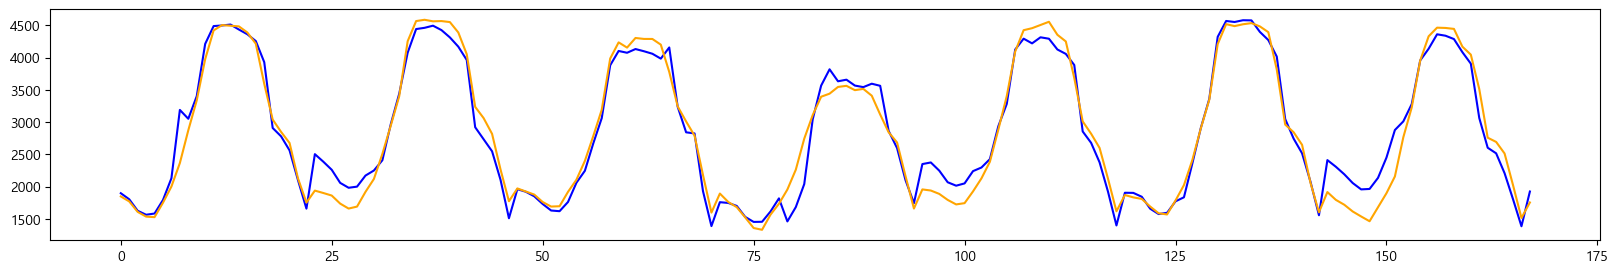

In [9]:
_ = plt.figure(figsize=(20, 3))
building_num = 1
_ = plt.plot(data.loc[data['건물번호'] == building_num]['true'], color='b')
_ = plt.plot(data.loc[data['건물번호'] == building_num]['pred'], color='orange')

- 건물유형 별 그룹 그래프

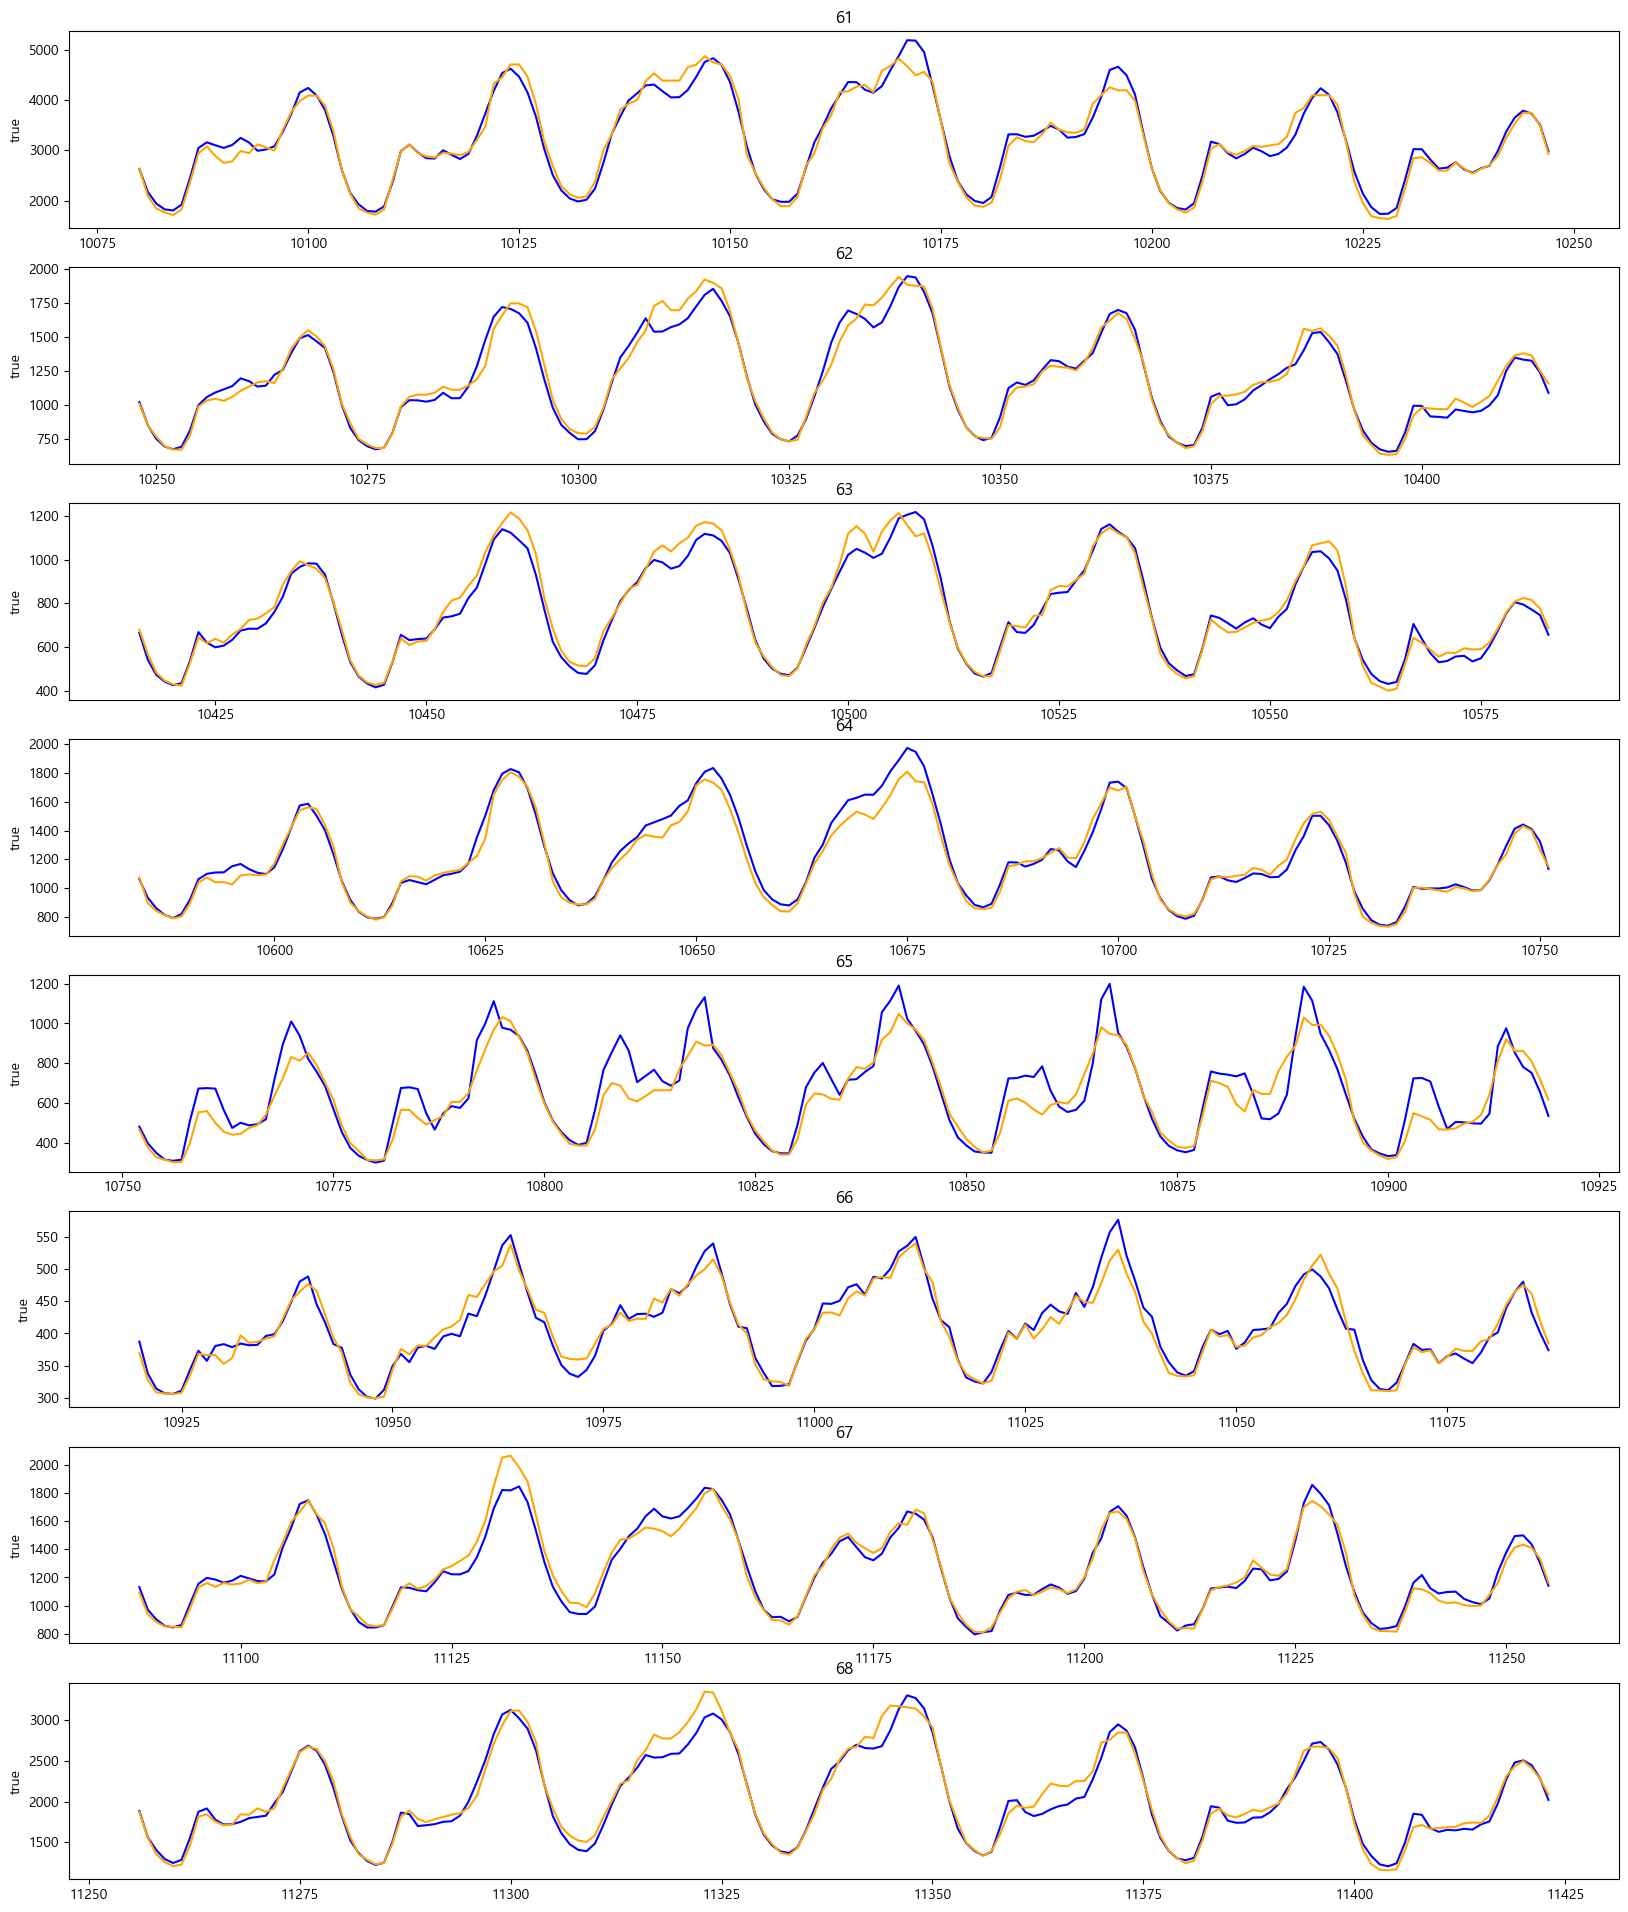

In [11]:
b_nums = get_b_nums(apart)
fig, ax = plt.subplots(nrows=len(b_nums), figsize=(20, 3*len(b_nums)))
for i, b_num in enumerate(b_nums):
    _ = ax[i].set_title(f'{b_num}')
    _ = sns.lineplot(data.loc[data['건물번호'] == b_num]['true'], color='b', ax=ax[i])
    _ = sns.lineplot(data.loc[data['건물번호'] == b_num]['pred'], color='orange', ax=ax[i])

### Submission

In [12]:
''' load submission datasets '''
public = pd.read_csv(f'../fraction/lightgbm_{eid}_public.csv')
uni = pd.read_csv(f'../fraction/lightgbm_{eid}_uni.csv')
dcenter = pd.read_csv(f'../fraction/lightgbm_{eid}_dcenter.csv')
dstore = pd.read_csv(f'../fraction/lightgbm_{eid}_dstore.csv')
medic = pd.read_csv(f'../fraction/lightgbm_{eid}_medic.csv')
comm = pd.read_csv(f'../fraction/lightgbm_{eid}_comm.csv')
apart = pd.read_csv(f'../fraction/lightgbm_{eid}_apart.csv')
lab = pd.read_csv(f'../fraction/lightgbm_{eid}_lab.csv')
biz = pd.read_csv(f'../fraction/lightgbm_{eid}_biz.csv')
mart = pd.read_csv(f'../fraction/lightgbm_{eid}_mart.csv')
hotel = pd.read_csv(f'../fraction/lightgbm_{eid}_hotel.csv')
others = pd.read_csv(f'../fraction/lightgbm_{eid}_others.csv')

' load submission datasets '

In [13]:
data = [public, uni, dcenter, dstore, medic, comm, apart, lab, biz, mart, hotel, others]

In [14]:
data = pd.concat(data)
data['datehour'] = pd.to_datetime(data['num_date_time'].str.split('_').str[1].str.replace(' ', ''), format='%Y%m%d%H')
data = data.sort_values(['건물번호', 'datehour']).reset_index(drop=True)
data = data.drop(['건물번호', 'datehour'], axis=1)

In [21]:
data.to_csv(f'../submission/lightgbm_{eid}.csv', index=False)